# Isomorfismo de Grafos

Dos grafos $G=(V,E)$ y $G'=(V',E')$ son \textbf{isomorfos} si existen dos biyecciones $f_v:V\mapsto V'$ y $f_e:E\mapsto E'$, entre sus v\'ertices como y sus aristas respectivamente, tal que para cualquier elemento $v$ y $w$ pertenecientes a $V$ tenemos:

$\{v,w\} \in E \iff \{f_v(v),f_v(w)\} \in E'$

In [19]:
import numpy as np

class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
        
    def adjacency_matrix(self):
        pass
    
    def adjacency_list(self):
        pass
    
class simple_graph(abstract_graph):
    
    def __init__(self,_edges):
        tmp=[]
        for (u,v) in _edges:
            if (v,u) not in tmp and v!=u:
                tmp.append((u,v))
        self.edges=tmp
        self.nodes={u for u,v in _edges} | {v for u,v in _edges}
     
    def adjacency_matrix(self):
        # completar
        n=len(self.nodes)
        mat=np.zeros((n,n))
        for i,v in enumerate(self.nodes):
            for j,k in enumerate(self.nodes):
                if (v,k) in self.edges:
                    mat[i,j]=1
                    mat[j,i]=1
        return mat
    
    
    def adjacency_list(self):
        adjacent=lambda n : {v for u,v in self.edges if u==n } | {u for u,v in self.edges if v==n}
        return {v:adjacent(v) for v in self.nodes}
        
    



In [31]:
E=[('a','b'),('a','e'),('a','f'),('b','c'),('b', 'd'),
   ('c','d'),('d','e'),('b','e'),('e','f')]
G=simple_graph(E)

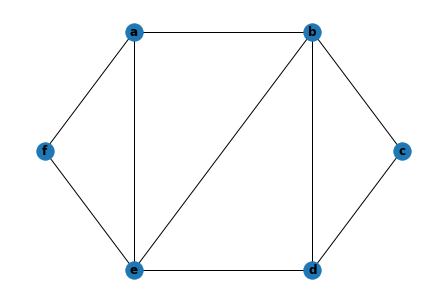

In [33]:
import networkx as nx

G_nx=nx.Graph()
G_nx.add_edges_from(E)
pos={'a':(0,0),'b':(1,0),'f':(-0.5,-1),'c':(1.5,-1),
     'e':(0,-2),'d':(1,-2)}
nx.draw(G_nx,pos=pos,with_labels=True, font_weight='bold')

In [115]:
E2=[('x','y'),('x','u'),('x','v'),('y','u'),('z', 'w'),
   ('z','u'),('u','v'),('v','w'),('z','v')]
G2=simple_graph(E2)

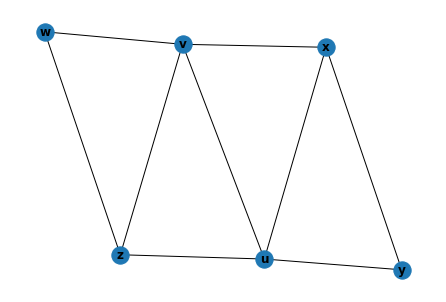

In [105]:
G_nx2=nx.Graph()
G_nx2.add_edges_from(E2)
nx.draw(G_nx2,with_labels=True, font_weight='bold')

In [106]:
nx.is_isomorphic(G_nx,G_nx2)

True

In [107]:
A=nx.adjacency_matrix(G_nx).todense()

In [108]:
A2=nx.adjacency_matrix(G_nx2).todense()

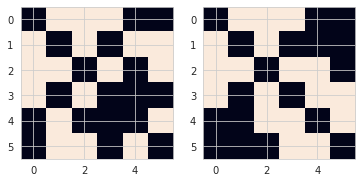

In [148]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns 

fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)
ax1.imshow(A)
ax2.imshow(A2)

In [111]:
import numpy.linalg

l1,v1=numpy.linalg.eig(A)
l2,v2=numpy.linalg.eig(A2)


In [112]:
np.allclose(l1,l2)

True

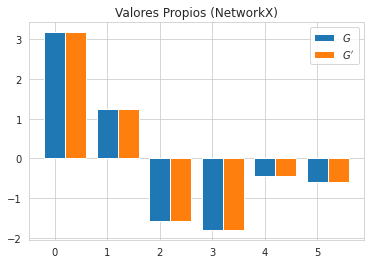

In [149]:
brw=0.4
br1 = np.arange(len(l1))
br2 = [x + brw for x in br1]
plt.bar(br1,height=l1,width = 0.4,label=r'$G$')
plt.bar(br2,height=l2,width = 0.4,label=r'$G^\prime$')
plt.title('Valores Propios (NetworkX)')
plt.legend()
plt.show()

In [116]:
A3=G.adjacency_matrix()
A4=G2.adjacency_matrix()


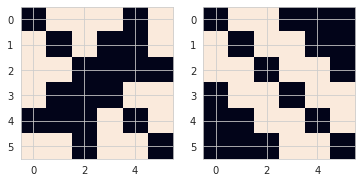

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True)
ax1.imshow(A3)
ax2.imshow(A4)

In [119]:
l3,v3=numpy.linalg.eig(A3)
l4,v4=numpy.linalg.eig(A4)

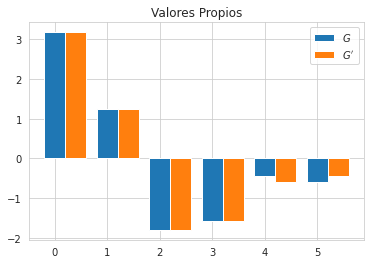

In [150]:
brw=0.4
br1 = np.arange(len(l3))
br2 = [x + brw for x in br1]
plt.bar(br1,height=l3,width = 0.4,label=r'$G$')
plt.bar(br2,height=l4,width = 0.4,label=r'$G^\prime$')
plt.title('Valores Propios')
plt.legend()
plt.show()

# Matrices de Permutacion
Dos grafos $G=(V,E)$ y $G'=(V',E')$ son isomorfos si y solo si existe una matriz de permutación $P$ y alg\'un orden de sus vértices, tal que sus matrices de adyacencia $A(G)$ y $A(G')$ son iguales.

$A(G)=P \times A(G')\times P^T$

In [144]:
import itertools as it

def permutation_matrix(perm):
    n=len(perm)
    P=np.zeros((n,n))
    for i in range(n):
        P[i,perm[i]]=1
    return P

def is_isomorphic_permutation(A1,A2,P):
    An=P.dot(A1).dot(P.T)
    return np.array_equal(A2,An)

def is_isomorphic(A1,A2):
    n=A1.shape[0]
    for p in it.permutations(range(n)):
        P=permutation_matrix(p)
        if is_isomorphic_permutation(A1,A2,P.T) or is_isomorphic_permutation(A1,A2,P):
            return True,P
    return False,None

In [145]:
_,P=is_isomorphic(A3,A4)

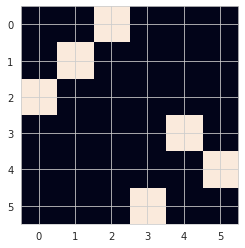

In [147]:
imshow(P)